In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import transforms
from torchsummary import summary
from torch import optim
from torch.utils.data import DataLoader,random_split
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from torchvision import models

In [10]:
t=transforms.Compose([  transforms.ToTensor(),
                        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [11]:
dataset=ImageFolder(root=r"./data/plantVillage/PlantVillage",transform=t)

In [14]:
train_ratio=0.8
train_size=int(train_ratio*len(dataset))
test_size=len(dataset)-train_size
train_data,test_data=random_split(dataset,[train_size,test_size])


In [15]:
train_loader=DataLoader(train_data,batch_size=128,shuffle=True)
test_loader=DataLoader(test_data,batch_size=128,shuffle=False)

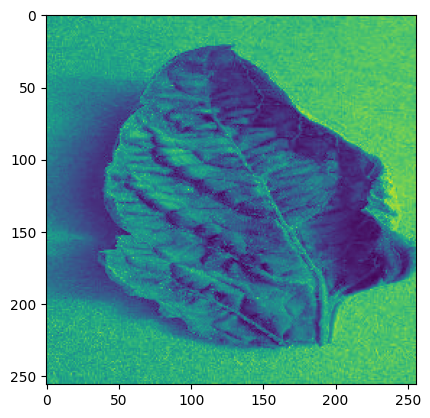

In [16]:
plt.imshow(train_data[1][0][0])
plt.show()

In [54]:
class LeNet_Module(nn.Module):
    def __init__(self,num_classes):
        self.num_classes=num_classes
        super(LeNet_Module,self).__init__()
        self.conv1=nn.Conv2d(3,32,3,stride=2)
        self.conv2=nn.Conv2d(32,64,3)
        self.conv3=nn.Conv2d(64,128,3,stride=2)
        self.fc1=nn.Linear(128*7*7,256)
        self.fc2=nn.Linear(256,128)
        self.fc3=nn.Linear(128,self.num_classes)
        self.pool1=nn.MaxPool2d(2,2)
        self.flat=nn.Flatten()
    def forward(self,x):
        x=self.conv1(x)
        x=F.relu(x)
        x=self.pool1(x)
        x=self.pool1(F.relu(self.conv2(x)))
        x=self.pool1(F.relu(self.conv3(x)))
        x=x.view(-1,128*7*7)
        x=torch.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [55]:
model=LeNet_Module(15)
print(summary(model,input_size=(3,256,256)))
criterian=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 127, 127]             896
         MaxPool2d-2           [-1, 32, 63, 63]               0
            Conv2d-3           [-1, 64, 61, 61]          18,496
         MaxPool2d-4           [-1, 64, 30, 30]               0
            Conv2d-5          [-1, 128, 14, 14]          73,856
         MaxPool2d-6            [-1, 128, 7, 7]               0
            Linear-7                  [-1, 256]       1,605,888
            Linear-8                  [-1, 128]          32,896
            Linear-9                   [-1, 15]           1,935
Total params: 1,733,967
Trainable params: 1,733,967
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.75
Forward/backward pass size (MB): 7.41
Params size (MB): 6.61
Estimated Total Size (MB): 14.77
--------------------------------------